In [33]:
import numpy as np, pandas as pd
from ISLP import load_data
import seaborn as sns
from matplotlib import pyplot as plt
import ISLP
from ISLP import load_data
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset
from torchmetrics import (MeanAbsoluteError ,
    R2Score)
from sklearn.metrics import f1_score
from torchinfo import summary
from torchvision.io import read_image
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
import pytorch_lightning as L
from pytorch_lightning.loggers import CSVLogger
from torchvision.datasets import MNIST , CIFAR100
from IPython.display import clear_output
from torchvision.models import (resnet50 ,
    ResNet50_Weights)
from torchvision.transforms import (Resize ,
    Normalize ,
    CenterCrop ,
    ToTensor)
from ISLP.torch import (SimpleDataModule ,
    SimpleModule ,
    ErrorTracker ,
    rec_num_workers)
from ISLP.torch.imdb import (load_lookup ,
    load_tensor ,
    load_sparse ,
    load_sequential)
from glob import glob
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import json
sns.set_palette("pastel")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
df = pd.read_csv('../../DATA/USArrests.csv', index_col='rownames')

In [47]:
scaled = StandardScaler().fit_transform(df)

In [48]:
agg = AgglomerativeClustering(distance_threshold =0, n_clusters=None, linkage='complete', compute_distances=True)

In [49]:
agg.fit(scaled)

AgglomerativeClustering(compute_distances=True, distance_threshold=0,
                        linkage='complete', n_clusters=None)

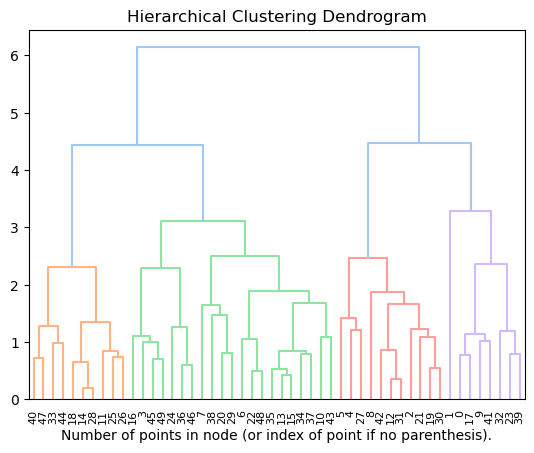

In [50]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [63]:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_distances=True)
agg.fit(scaled)

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        n_clusters=3)

In [83]:
pca = PCA(n_components=2).fit(scaled)

In [87]:
out = pd.DataFrame(pca.transform(X=scaled))
out['label'] = agg.labels_

<Axes: xlabel='0', ylabel='1'>

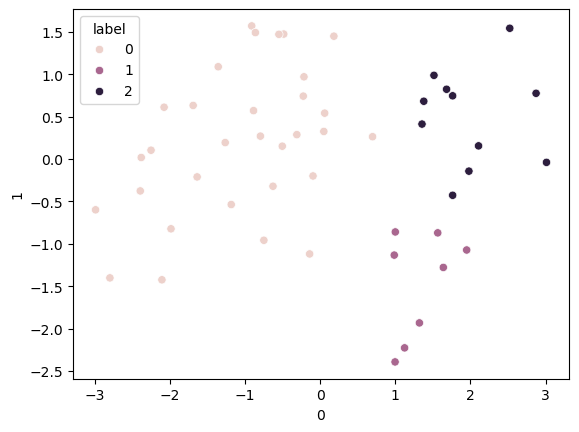

In [91]:
sns.scatterplot(out, x=0 ,y=1 ,hue='label')

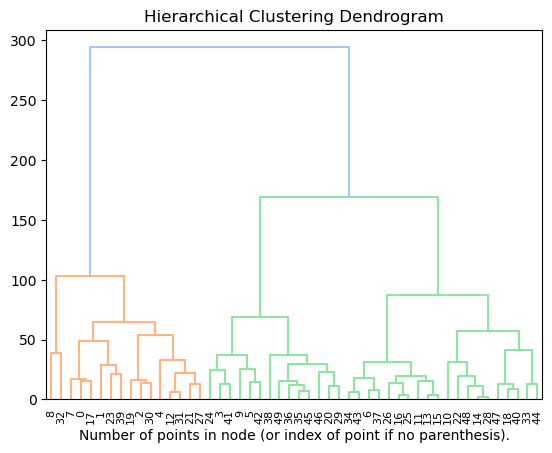

In [96]:
agg = AgglomerativeClustering(distance_threshold =0, n_clusters=None, linkage='complete', compute_distances=True)
agg.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

<Axes: xlabel='0', ylabel='1'>

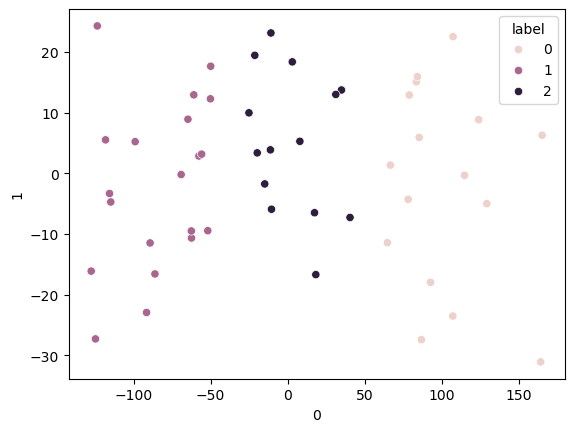

In [100]:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete', compute_distances=True)
agg.fit(df)
pca = PCA(n_components=2).fit(df)
out = pd.DataFrame(pca.transform(X=df))
out['label'] = agg.labels_
sns.scatterplot(out, x=0 ,y=1 ,hue='label')